In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Avg Salary,Company txt,Job State,Same State,Age,Python_yn,R_yn,Spark_yn,Aws_yn,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,51,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,40,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,14,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,59,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,26,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"

def seniority(title):
    senior = ["sr","senior","lead","principal"]
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower():
        return "jr"
    else:
        return "na"

- job title and seniority
- fix state Los Angeles
- job description length
- competitor count
- hourly wage to annual
- remove new line from job title

In [6]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [8]:
df["seniority"] = df["Job Title"].apply(seniority)

In [9]:
df.seniority.value_counts()

seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [10]:
df["Job State"] = df["Job State"].apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")

In [11]:
df["Job State"].value_counts()

Job State
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [12]:
df["desc_length"] = df["Job Description"].apply(lambda x: len(x))
df["desc_length"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_length, Length: 742, dtype: int64

In [13]:
df["Competitors"] = df["Competitors"].apply(lambda x: x.split(',') if x != '-1' else 0)

In [14]:
df["Competitors"]

0                                                      0
1                                                      0
2                                                      0
3      [Oak Ridge National Laboratory,  National Rene...
4               [Commerce Signals,  Cardlytics,  Yodlee]
                             ...                        
737                       [Pfizer,  AstraZeneca,  Merck]
738                  [See Tickets,  TicketWeb,  Vendini]
739                                                    0
740                                                    0
741                                                    0
Name: Competitors, Length: 742, dtype: object

In [15]:
df["num_comp"] = df["Competitors"].apply(lambda x: len(x) if x != 0 else 0)

In [16]:
df["num_comp"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [18]:
# hourly wage to annual
df["Min Salary"] = df.apply(lambda x:x["Min Salary"]*2 if x["Hourly"] == 1 else x["Min Salary"],axis=1)
df["Max Salary"] = df.apply(lambda x:x["Max Salary"]*2 if x["Hourly"] == 1 else x["Max Salary"],axis=1)

In [19]:
df["Company txt"] = df["Company txt"].apply(lambda x: x.replace("\n",''))

In [20]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,Min Salary,Max Salary,Avg Salary,Same State,Age,Python_yn,R_yn,Spark_yn,Aws_yn,Excel_yn,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,50.322102,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.026459,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

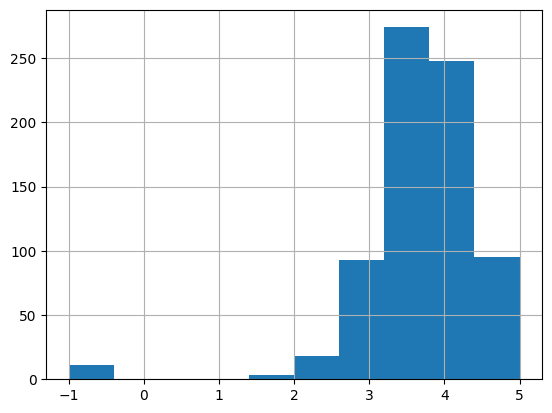

In [21]:
df.Rating.hist()

<Axes: >

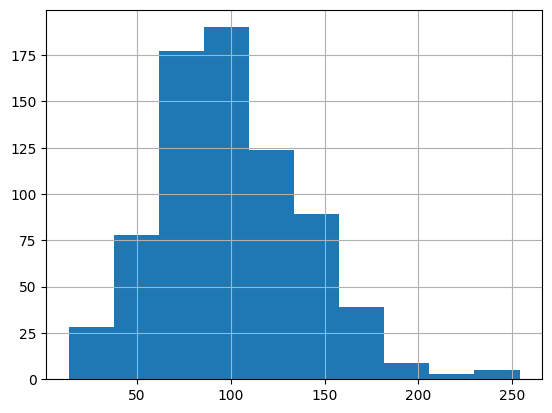

In [22]:
df["Avg Salary"].hist()

<Axes: >

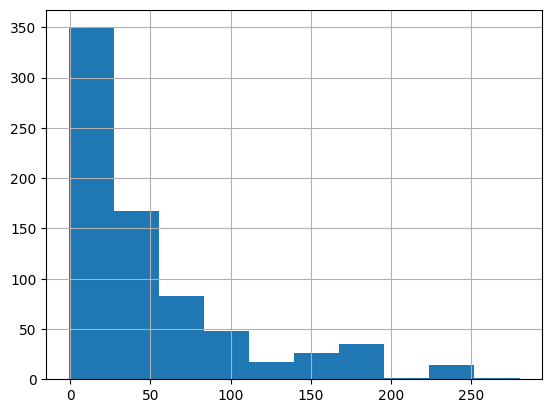

In [23]:
df.Age.hist()

<Axes: >

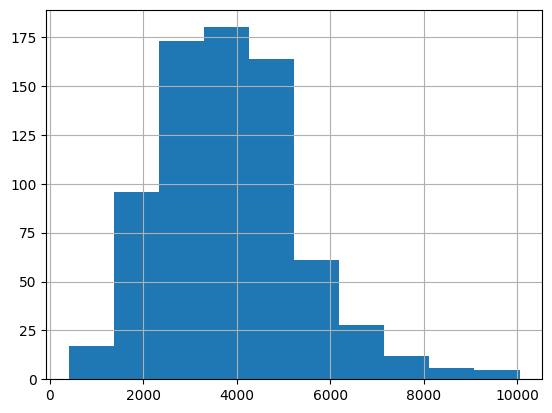

In [24]:
df["desc_length"].hist()

<Axes: >

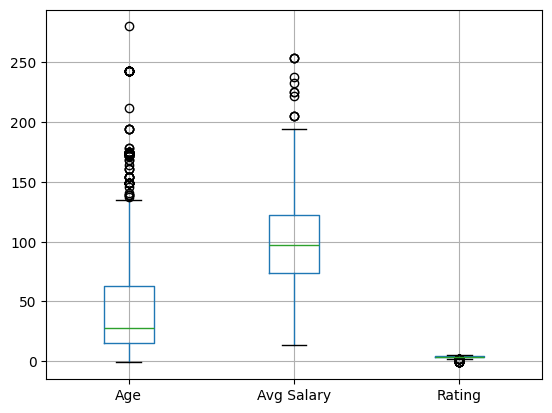

In [25]:
df.boxplot(column=["Age","Avg Salary","Rating"])

<Axes: >

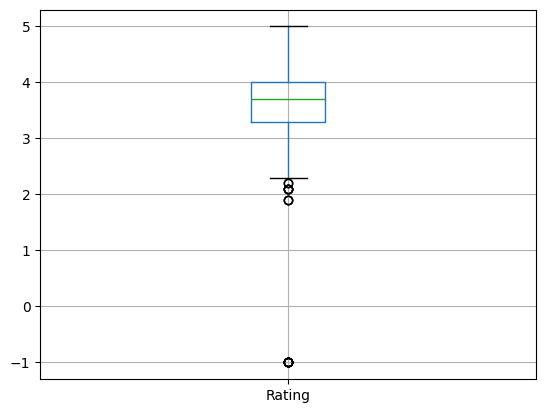

In [26]:
df.boxplot(column="Rating")

In [27]:
df[["Age","Avg Salary","desc_length","Rating"]].corr()

,Age,Avg Salary,desc_length,Rating
Age,1.000000,0.019328,0.164995,0.027660
Avg Salary,0.019328,1.000000,0.078808,0.013492
desc_length,0.164995,0.078808,1.000000,-0.012281
Rating,0.027660,0.013492,-0.012281,1.000000


<Axes: >

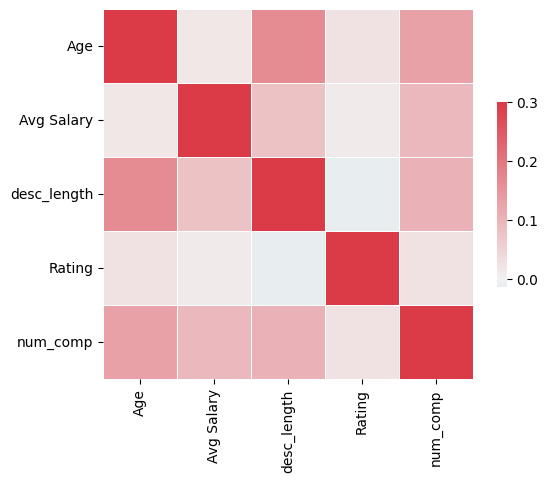

In [28]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[["Age","Avg Salary","desc_length","Rating","num_comp"]].corr(),vmax=0.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',"Company txt","Job State","Same State",'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority']]

graph for Location total = 200


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


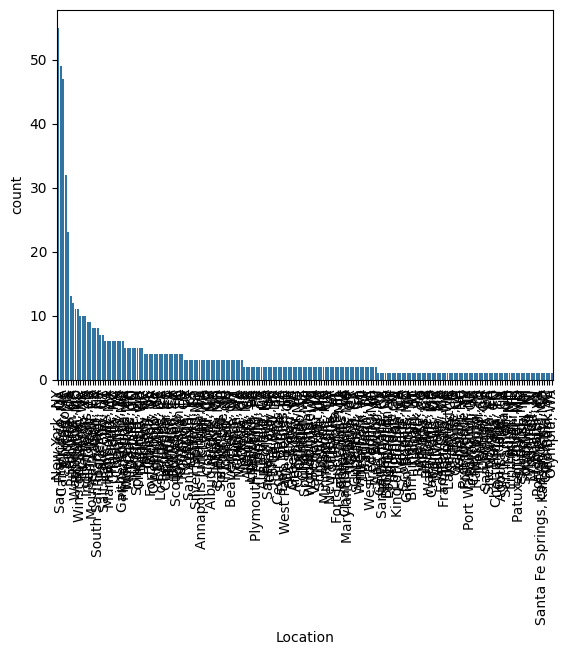

graph for Headquarters total = 198


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


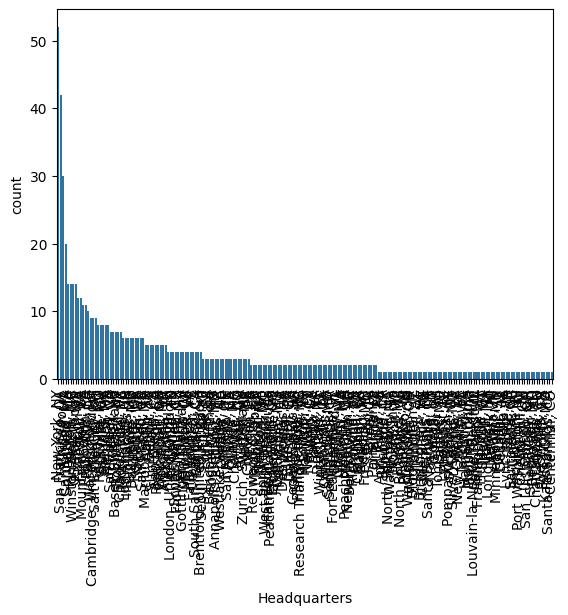

graph for Size total = 9


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


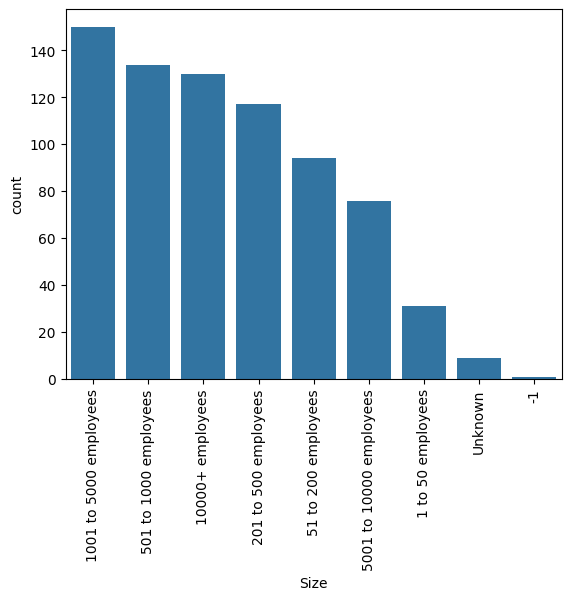

graph for Type of ownership total = 11


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


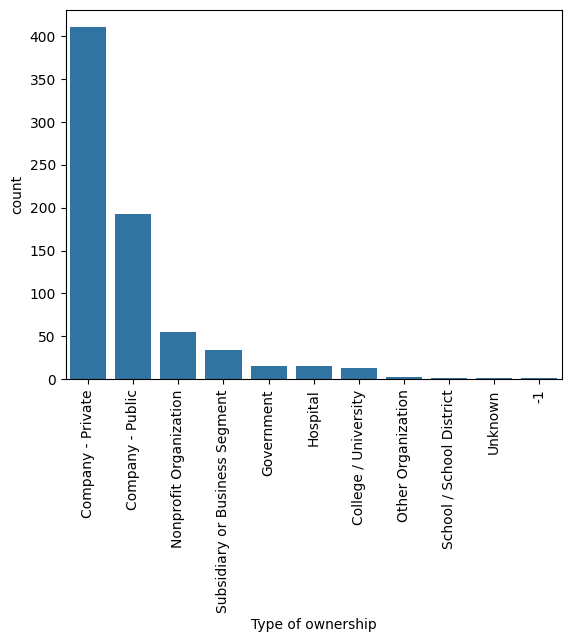

graph for Industry total = 60


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


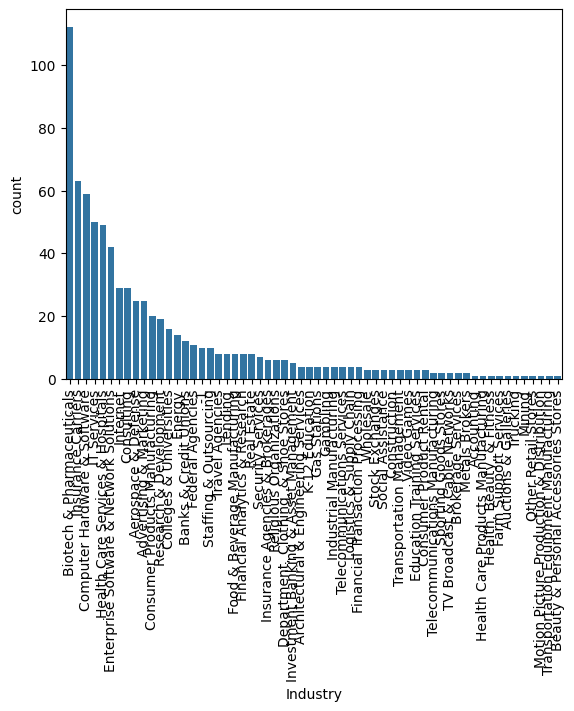

graph for Sector total = 25


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


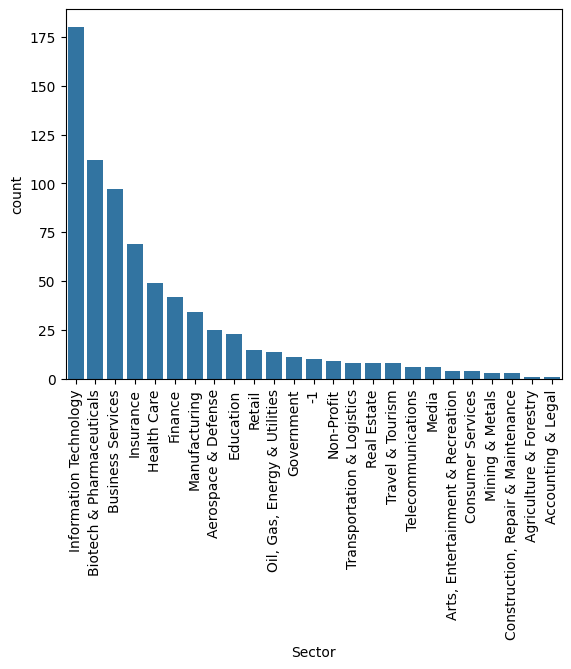

graph for Revenue total = 14


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


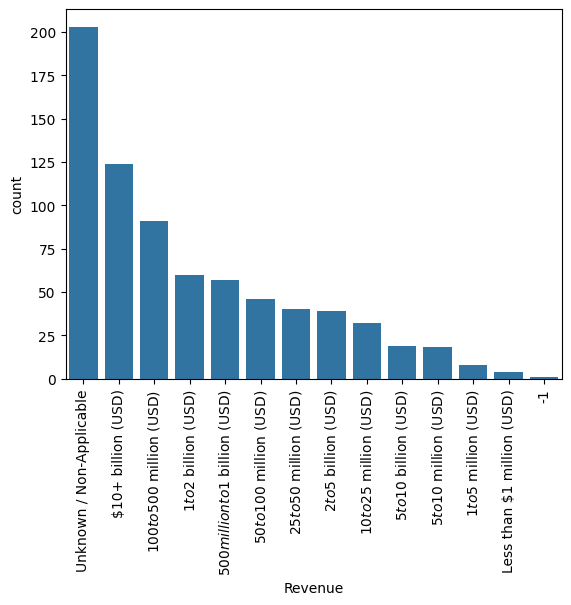

graph for Company txt total = 343


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


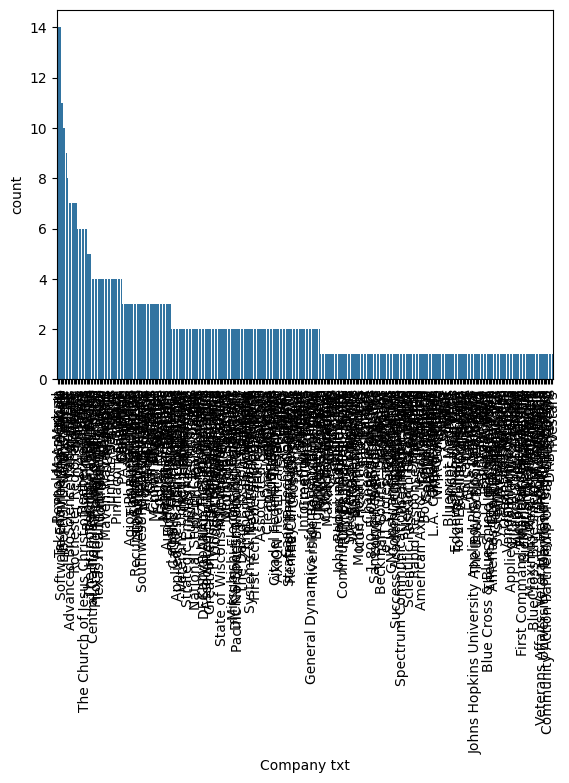

graph for Job State total = 37


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


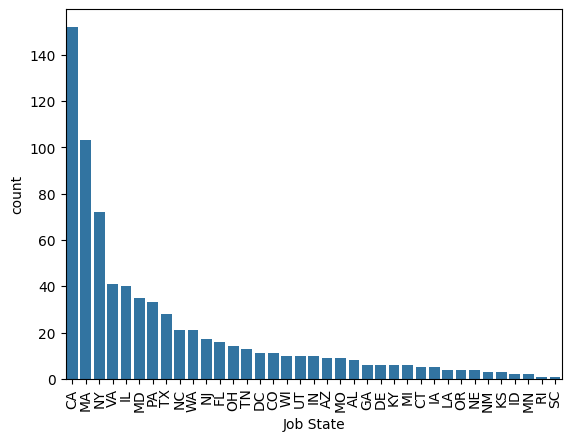

graph for Same State total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


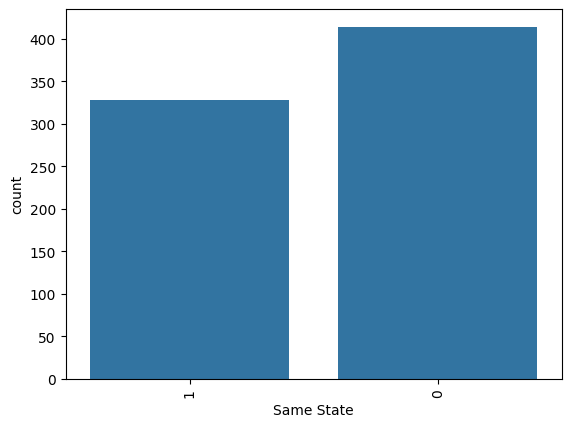

graph for Python_yn total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


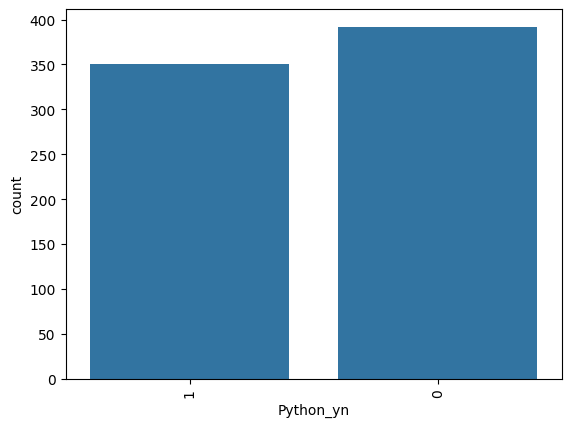

graph for R_yn total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


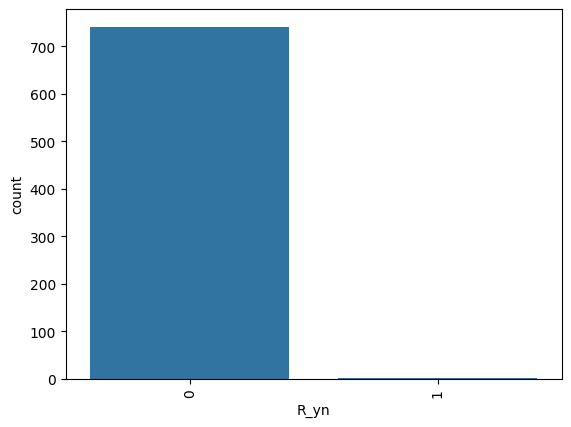

graph for Spark_yn total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


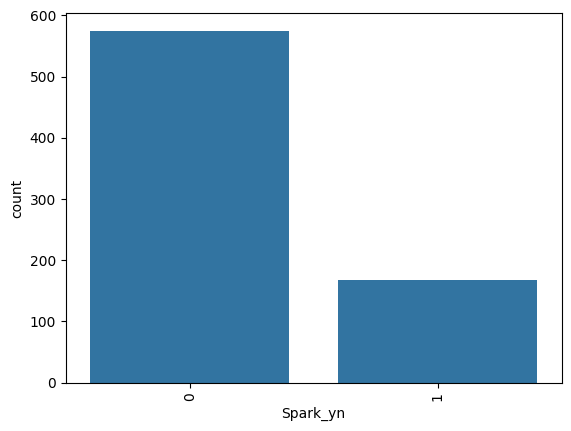

graph for Aws_yn total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


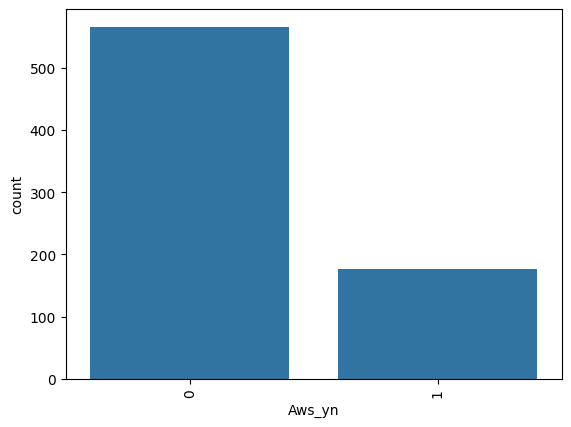

graph for Excel_yn total = 2


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


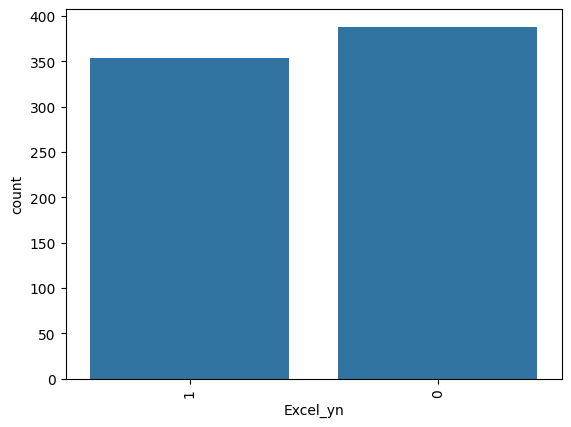

graph for job_simp total = 7


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


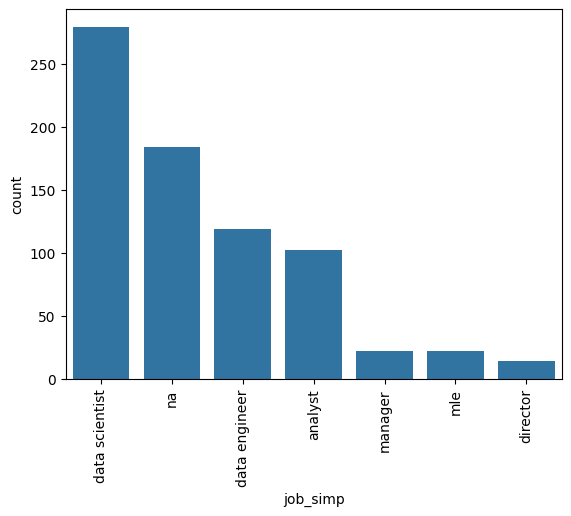

graph for seniority total = 3


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\2767680763.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)


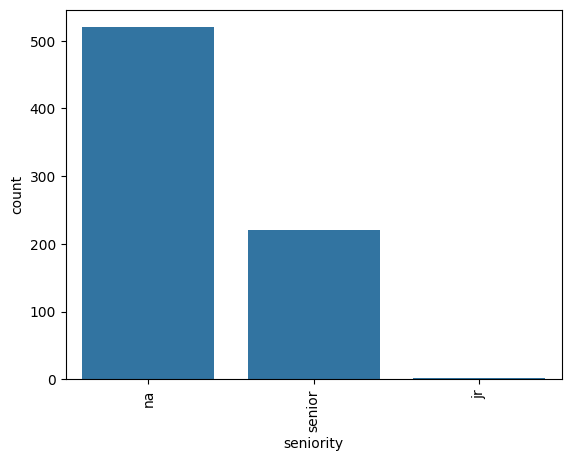

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s total = %d"%(i,len(cat_num)))
    sns.barplot(x=cat_num.index,y=cat_num).set_xticklabels(cat_num.index,rotation=90)
    plt.show()

graph for Location total = 20


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\945415200.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


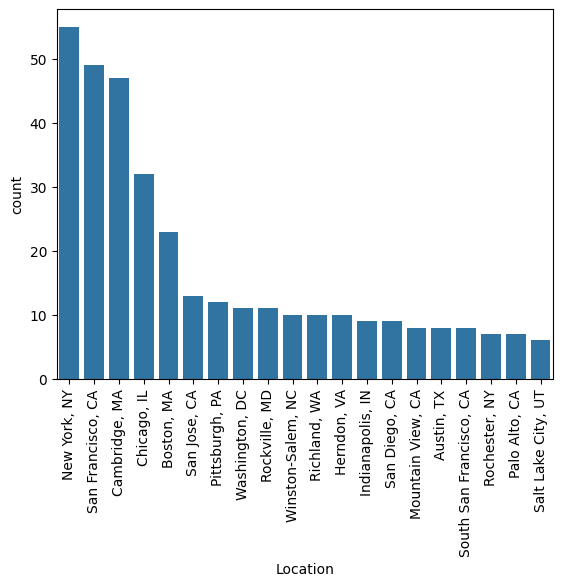

graph for Headquarters total = 20


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\945415200.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


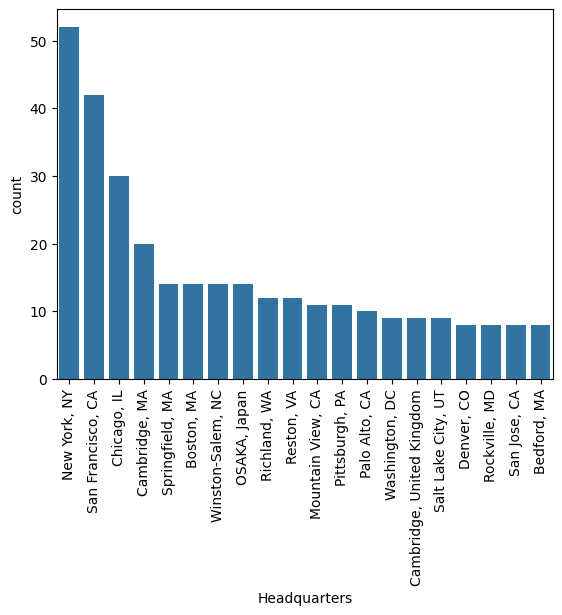

graph for Company txt total = 20


C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_22004\945415200.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


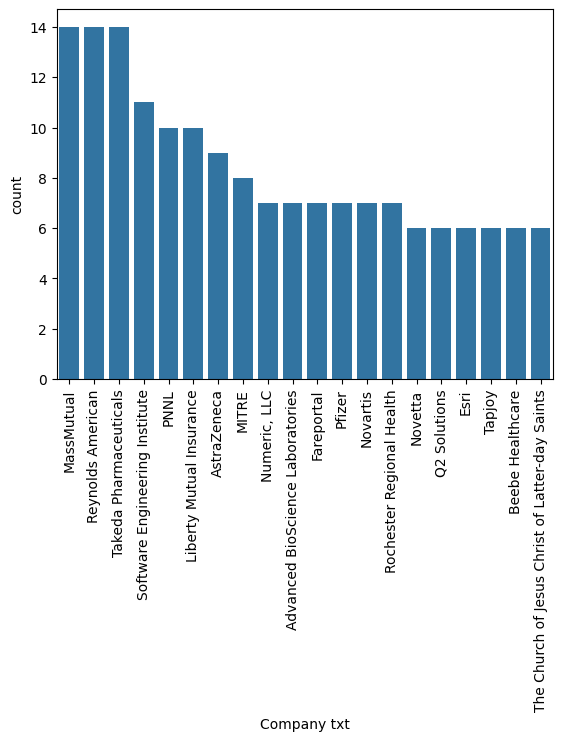

In [34]:
for i in df_cat[["Location","Headquarters","Company txt"]].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [39]:
df.pivot_table(index="job_simp",values="Avg Salary").sort_values(by="Avg Salary",ascending=False)

,Avg Salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [41]:
df.pivot_table(index=["job_simp","seniority"],values="Avg Salary",observed=True)

Avg Salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [43]:
df.pivot_table(index="Job State",values="Avg Salary").sort_values(by = "Avg Salary", ascending=False)

,Avg Salary
Job State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [44]:
pd.set_option("display.max_rows",None)

In [54]:
df.pivot_table(index=["Job State","job_simp"],values='Avg Salary',aggfunc='count',).sort_values(by="Job State",ascending=False).\
rename({"Avg Salary":"Count"},axis=1)

Count
Job State job_simp             
WI        na                  4
          data scientist      3
          analyst             3
WA        na                  1
          data scientist     17
          analyst             3
VA        na                  5
          mle                 2
          data scientist     18
          data engineer      10
          analyst             6
UT        data engineer       3
          analyst             4
          data scientist      3
TX        na                  7
          data scientist     13
          data engineer       8
TN        data scientist      1
          data engineer      10
          analyst             2
SC        na                  1
RI        analyst             1
PA        manager             3
          data engineer       1
          data scientist      6
          analyst             8
          mle                 7
          na                  8
OR        data scientist      3
          data engineer       1
OH        na                  3
          data scientist      7
          analyst             4
NY        na                 12
          mle                 2
          data scientist     40
          data engineer       4
          analyst            14
NM        data scientist      3
NJ        data scientist      4
          analyst             6
          data engineer       2
          manager             2
          director            2
          na                  1
NE        na                  4
NC        na                 12
          data scientist      3
          data engineer       6
MO        na                  3
          manager             1
          data scientist      3
          analyst             2
MN        data engineer       1
          analyst             1
MI        manager             2
          data scientist      4
MD        na                 16
          data scientist     13
          data engineer       3
          analyst             3
MA        na                 46
          manager             5
          director            6
          data scientist     30
          data engineer      12
          analyst             4
LA        analyst             1
          data engineer       2
          na                  1
KY        na                  4
          data scientist      2
KS        mle                 3
IN        na                  4
          data scientist      2
          data engineer       4
IL        analyst             3
          na                  6
          mle                 2
          director            6
          data scientist     15
          data engineer       8
ID        analyst             2
IA        analyst             2
          data engineer       3
GA        data scientist      3
          na                  3
FL        data scientist      7
          data engineer       3
          analyst             6
DE        na                  6
DC        data scientist      5
          data engineer       4
          analyst             2
CT        na                  3
          data scientist      2
CO        mle                 1
          data engineer       3
          analyst             1
          na                  3
          data scientist      3
CA        na                 27
          mle                 5
          manager             9
          data scientist     68
          data engineer      25
          analyst            18
AZ        data scientist      1
          data engineer       5
          analyst             1
          na                  2
AL        na                  2
          data engineer       1
          analyst             5

In [52]:
df.loc[df["job_simp"] == "data scientist",:].pivot_table(index="Job State",values='Avg Salary').round(2).sort_values(by="Avg Salary",ascending=False)

,Avg Salary
Job State,
DC,149.00
CA,142.52
UT,140.50
MO,127.67
IL,117.23
NC,117.00
NY,115.25
MA,113.75
WI,113.50


In [ ]:
# Rating, Industry, Sector, Revenue, num_comp, Hourly, Employer Provided, python_yn, R_yn, 'Spark_yn', 'Aws_yn', 'Excel_yn', 'desc_length', 'Type of ownership'

In [59]:
l = ['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Hourly', 'Employer Provided', 'Python_yn', 'R_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn', 'desc_length', 'Type of ownership']
for i in l:
    print(i)
    print(pd.pivot_table(data=df,index=i,values='Avg Salary').sort_values(by="Avg Salary",ascending=False))
    print('-'*50)

Rating
        Avg Salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
--------------------------------------------------
Industry
                                          Avg Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                

In [60]:
pd.pivot_table(df,index="Revenue",values="Avg Salary",columns="Python_yn",aggfunc='count')

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [63]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.0 kB 330.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 655.4 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.2 MB/s eta 0:00:00


In [66]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.5 MB 1.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 2.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 2.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 2.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.9 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 3.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 3.3 MB/s eta 0:00:01
   ---------------

In [69]:
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [75]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ELmohannd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [72]:
def punctuation_stop(txt):
    filtered = []
    sw = set(stopwords.words("english"))
    tok = word_tokenize(txt)
    for w in tok:
        if w not in sw and w.isalpha():
            filtered.append(w.lower())

    return filtered

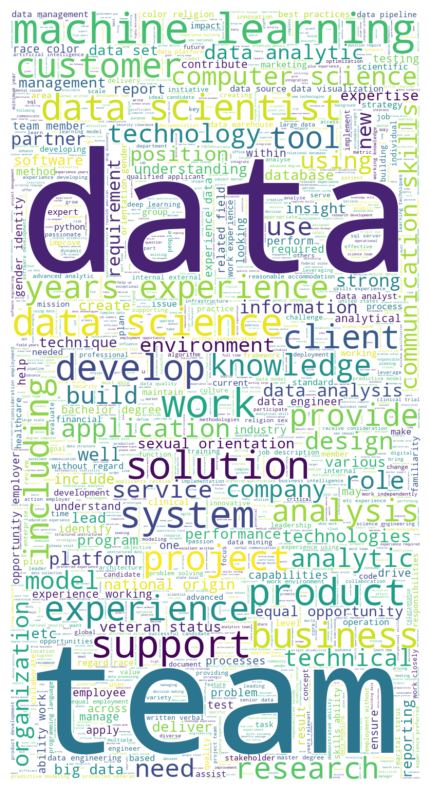

In [78]:
words = " ".join(df["Job Description"])
words_filtered = punctuation_stop(words)
text = " ".join(words_filtered)
wc = WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()